In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
from scipy import stats
import analysis_perDRG
import scikit_posthocs as sp

In [5]:
name = 'd7LperDRG_'

with open('D7_SNI_area.json') as f:
    results_sni = json.load(f)
with open('D7_Sham_area.json') as f:
    results_sham = json.load(f)

In [6]:
sham_l4il = analysis_perDRG.GroupData(results_sham, 'L4IL', number_of_rats=6)
sham_l4cl = analysis_perDRG.GroupData(results_sham, 'L4CL', number_of_rats=6)

sni_l4il = analysis_perDRG.GroupData(results_sni, 'L4IL', number_of_rats=6)
sni_l4cl = analysis_perDRG.GroupData(results_sni, 'L4CL', number_of_rats=6)

sham_l5il = analysis_perDRG.GroupData(results_sham, 'L5IL', number_of_rats=6)
sham_l5cl = analysis_perDRG.GroupData(results_sham, 'L5CL', number_of_rats=6)

sni_l5il = analysis_perDRG.GroupData(results_sni, 'L5IL', number_of_rats=6)
sni_l5cl = analysis_perDRG.GroupData(results_sni, 'L5CL', number_of_rats=6)

C:\Users\emsch\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\emsch\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [7]:
def statistic(group_a_data, group_b_data):
    statistic, p_value_a = stats.shapiro(group_a_data)
    statistic, p_value_b = stats.shapiro(group_b_data)
    
    if (p_value_b < 0.05) or (p_value_a < 0.05):
        # data is not normally distrubuted (<0.05)
        statistic, p_value = stats.mannwhitneyu(group_a_data, group_b_data, alternative='two-sided')
        print('Mann Whitney U: p-value='+"{:.5f}".format(p_value))
    else:
        # data is normally distributed
        # test for equal variance
        statistic, p_value = stats.levene(group_a_data, group_b_data)
        if p_value < 0.05:
            # no equal variance
            equal_variance = False
        else: 
            equal_variance = True
        # perform t-test
        statistic, p_value = stats.ttest_ind(group_a_data, group_b_data, equal_var=equal_variance, nan_policy='omit')
        print('T-test: p-value='+"{:.5f}".format(p_value))

In [8]:
def quick_plot(group_a, group_b, feature):
    group_a_data = getattr(group_a, feature)
    group_b_data = getattr(group_b, feature)    
    
    statistic(group_a_data, group_b_data)
    
    plt.figure(figsize=(4,6))
    sns.boxplot(data=[group_a_data, group_b_data])
    sns.stripplot(data=[group_a_data, group_b_data], jitter=0.2)
    ax = plt.gca()
    ax.set_xticklabels([group_a.name, group_b.name], fontsize=16)
    plt.ylabel(feature, fontsize=16)
    plt.show()

In [12]:
def plot_all(feature, ylabel):
    group_a1_data = getattr(sham_l4il, feature)
    group_a2_data = getattr(sham_l5il, feature)
    group_b1_data = getattr(sham_l4cl, feature)
    group_b2_data = getattr(sham_l5cl, feature)
    group_c1_data = getattr(sni_l4il, feature)
    group_c2_data = getattr(sni_l5il, feature)
    group_d1_data = getattr(sni_l4cl, feature) 
    group_d2_data = getattr(sni_l5cl, feature)
    #statistic(group_a_data, group_b_data)
    
    plt.figure(figsize=(24,8))
    
    labels=['Sham\nL4IL', 'Sham\nL5IL', 'Sham\nL4CL', 'Sham\nL5CL', 'SNI\nL4IL', 'SNI\nL5IL', 'SNI\nL4CL', 'SNI\nL5CL']

    c='k'
    alpha=1
    standard_props = {"color":c, "alpha":alpha, "linewidth":5}
    markers= ['D','o']
    line_props = standard_props
    bbox_props = {**standard_props, 'facecolor': 'w', 'edgecolor':c} #dict(edgecolor=c, alpha=alpha, linewidth=5, facecolor='w')
    median_props = standard_props
    cap_props = standard_props
    linewidth = 5
    fontsize = 32
    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines['left'].set_linewidth(linewidth)
    ax.spines['bottom'].set_linewidth(linewidth)
    ax.tick_params(length=10, width=linewidth)
    #ax.set_xlim([0, 100])
    ax.set_ylim([-1, 101])
    plt.xticks(fontname="Arial", fontsize=fontsize)
    plt.yticks(fontname="Arial", fontsize=fontsize)


    plt.ylabel(ylabel, fontname="Arial", fontsize=34)

    

    sns.boxplot(data=[group_a1_data, group_a2_data, group_b1_data, group_b2_data, group_c1_data, group_c2_data, group_d1_data, group_d2_data], 
                width=0.5, palette='Blues', whiskerprops=line_props, boxprops=bbox_props,
                capprops=cap_props, medianprops=median_props, fliersize=0)
    sns.stripplot(data=[group_a1_data, group_a2_data, group_b1_data, group_b2_data, group_c1_data, group_c2_data, group_d1_data, group_d2_data],
                  jitter=0.2, dodge=True, size=8, marker='o', palette='tab20c')
    
    ax.set_xticklabels(labels, fontname="Arial", fontsize=34)
    
    #plt.savefig(name+feature+'.png', bbox_inches = "tight")
    plt.show()

In [13]:
def statistic_all(feature):
    group_a1_data = getattr(sham_l4il, feature)
    group_a2_data = getattr(sham_l5il, feature)
    group_b1_data = getattr(sham_l4cl, feature)
    group_b2_data = getattr(sham_l5cl, feature)
    group_c1_data = getattr(sni_l4il, feature)
    group_c2_data = getattr(sni_l5il, feature)
    group_d1_data = getattr(sni_l4cl, feature) 
    group_d2_data = getattr(sni_l5cl, feature)
    stats = sp.posthoc_mannwhitney([group_a1_data, group_a2_data, group_b1_data, group_b2_data, group_c1_data, group_c2_data, group_d1_data, group_d2_data])
    stats.columns = ['Sham L4IL', 'Sham L5IL', 'Sham L4CL', 'Sham L5CL', 'SNI L4IL', 'SNI L5IL', 'SNI L4CL', 'SNI L5CL']
    stats.index = ['Sham L4IL', 'Sham L5IL', 'Sham L4CL', 'Sham L5CL', 'SNI L4IL', 'SNI L5IL', 'SNI L4CL', 'SNI L5CL']
    return stats.round(4)

### L4 vs L5

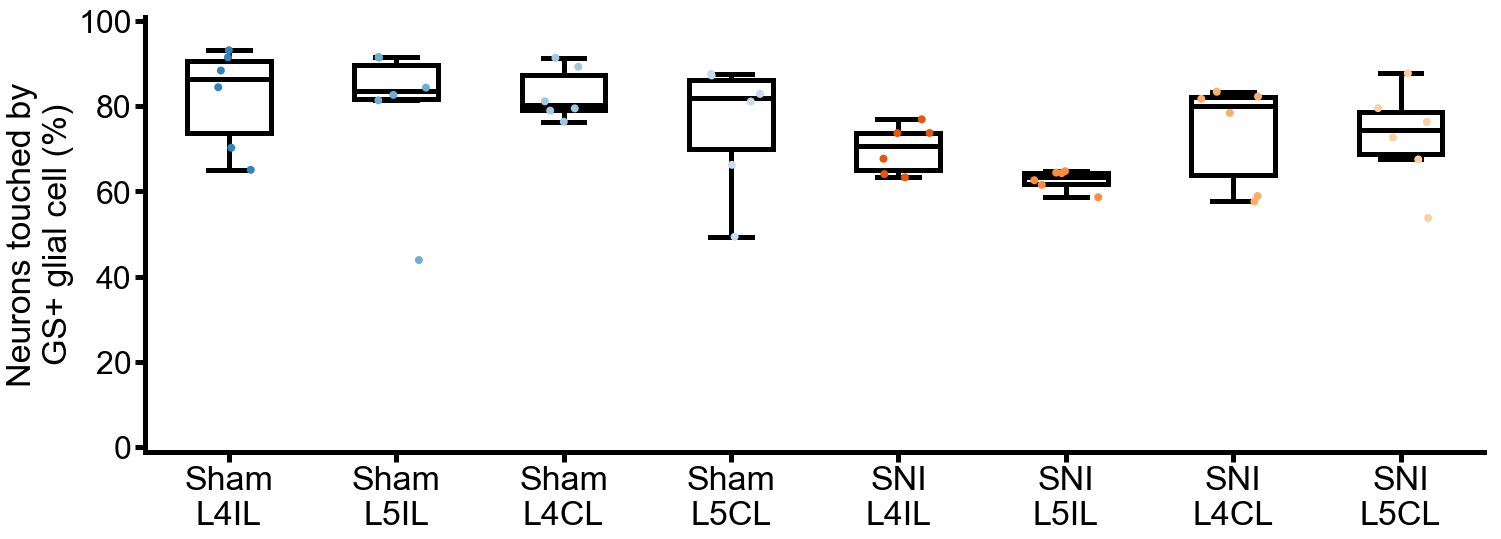

In [14]:
plot_all('ring_ratios_gs', 'Neurons touched by\nGS+ glial cell (%)')

In [11]:
statistic_all('ring_ratios_gs')

,Sham L4IL,Sham L5IL,Sham L4CL,Sham L5CL,SNI L4IL,SNI L5IL,SNI L4CL,SNI L5CL
Sham L4IL,1.0000,0.6889,0.8102,0.2980,0.0927,0.0051,0.1282,0.2298
Sham L5IL,0.6889,1.0000,0.3785,0.5752,0.0656,0.0656,0.2298,0.1735
Sham L4CL,0.8102,0.3785,1.0000,0.6889,0.0082,0.0051,0.4712,0.0927
Sham L5CL,0.2980,0.5752,0.6889,1.0000,0.2298,0.0656,0.5752,0.6889
SNI L4IL,0.0927,0.0656,0.0082,0.2298,1.0000,0.0656,0.3785,0.5752
SNI L5IL,0.0051,0.0656,0.0051,0.0656,0.0656,1.0000,0.2980,0.0656
SNI L4CL,0.1282,0.2298,0.4712,0.5752,0.3785,0.2980,1.0000,0.6889
SNI L5CL,0.2298,0.1735,0.0927,0.6889,0.5752,0.0656,0.6889,1.0000


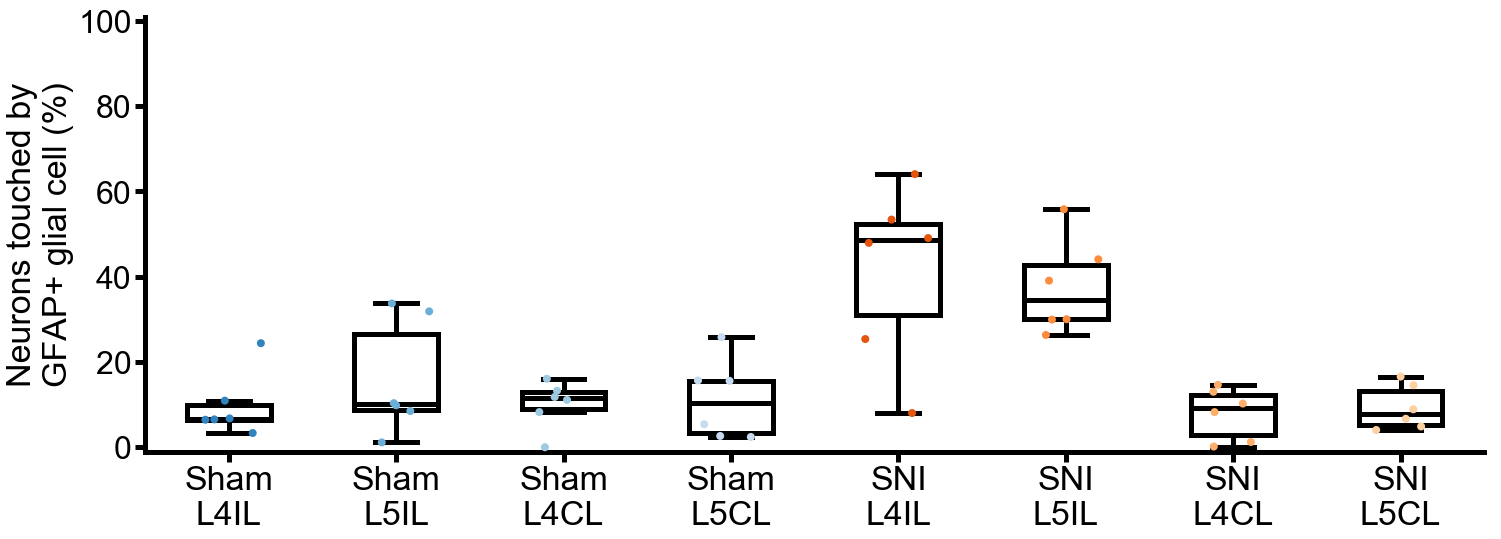

In [12]:
plot_all('ring_ratios_gfap', 'Neurons touched by\nGFAP+ glial cell (%)')

In [13]:
statistic_all('ring_ratios_gfap')

,Sham L4IL,Sham L5IL,Sham L4CL,Sham L5CL,SNI L4IL,SNI L5IL,SNI L4CL,SNI L5CL
Sham L4IL,1.0000,0.3785,0.3785,0.9362,0.0131,0.0051,0.9362,0.9362
Sham L5IL,0.3785,1.0000,0.9362,0.6889,0.0927,0.0656,0.4712,0.4712
Sham L4CL,0.3785,0.9362,1.0000,0.9362,0.0453,0.0051,0.5752,0.8102
Sham L5CL,0.9362,0.6889,0.9362,1.0000,0.0306,0.0051,0.3785,0.9362
SNI L4IL,0.0131,0.0927,0.0453,0.0306,1.0000,0.6889,0.0306,0.0202
SNI L5IL,0.0051,0.0656,0.0051,0.0051,0.6889,1.0000,0.0051,0.0051
SNI L4CL,0.9362,0.4712,0.5752,0.3785,0.0306,0.0051,1.0000,0.8102
SNI L5CL,0.9362,0.4712,0.8102,0.9362,0.0202,0.0051,0.8102,1.0000


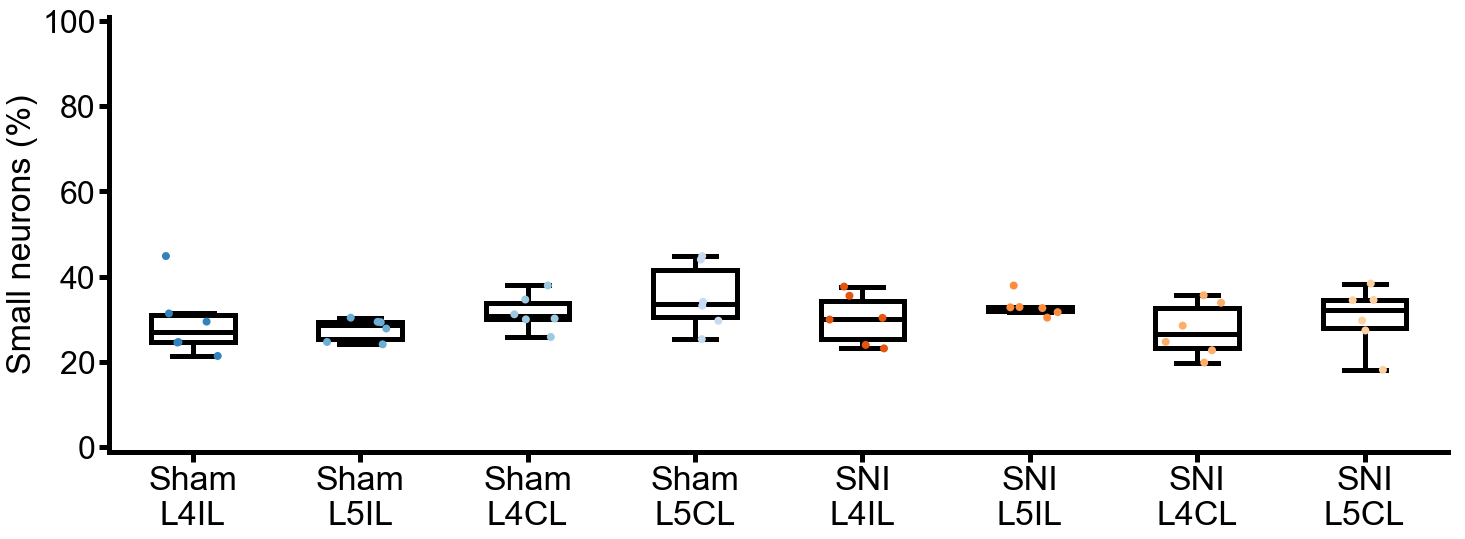

In [14]:
plot_all('small_neurons_percentage', 'Small neurons (%)')

In [15]:
statistic_all('small_neurons_percentage')

,Sham L4IL,Sham L5IL,Sham L4CL,Sham L5CL,SNI L4IL,SNI L5IL,SNI L4CL,SNI L5CL
Sham L4IL,1.0000,0.9362,0.2980,0.1735,0.8102,0.0927,0.9362,0.5752
Sham L5IL,0.9362,1.0000,0.0656,0.0453,0.5752,0.0051,0.9362,0.2980
Sham L4CL,0.2980,0.0656,1.0000,0.6889,0.5752,0.3785,0.2298,0.8102
Sham L5CL,0.1735,0.0453,0.6889,1.0000,0.3785,0.5752,0.1282,0.6889
SNI L4IL,0.8102,0.5752,0.5752,0.3785,1.0000,0.2298,0.4712,0.9362
SNI L5IL,0.0927,0.0051,0.3785,0.5752,0.2298,1.0000,0.2298,0.8102
SNI L4CL,0.9362,0.9362,0.2298,0.1282,0.4712,0.2298,1.0000,0.4712
SNI L5CL,0.5752,0.2980,0.8102,0.6889,0.9362,0.8102,0.4712,1.0000


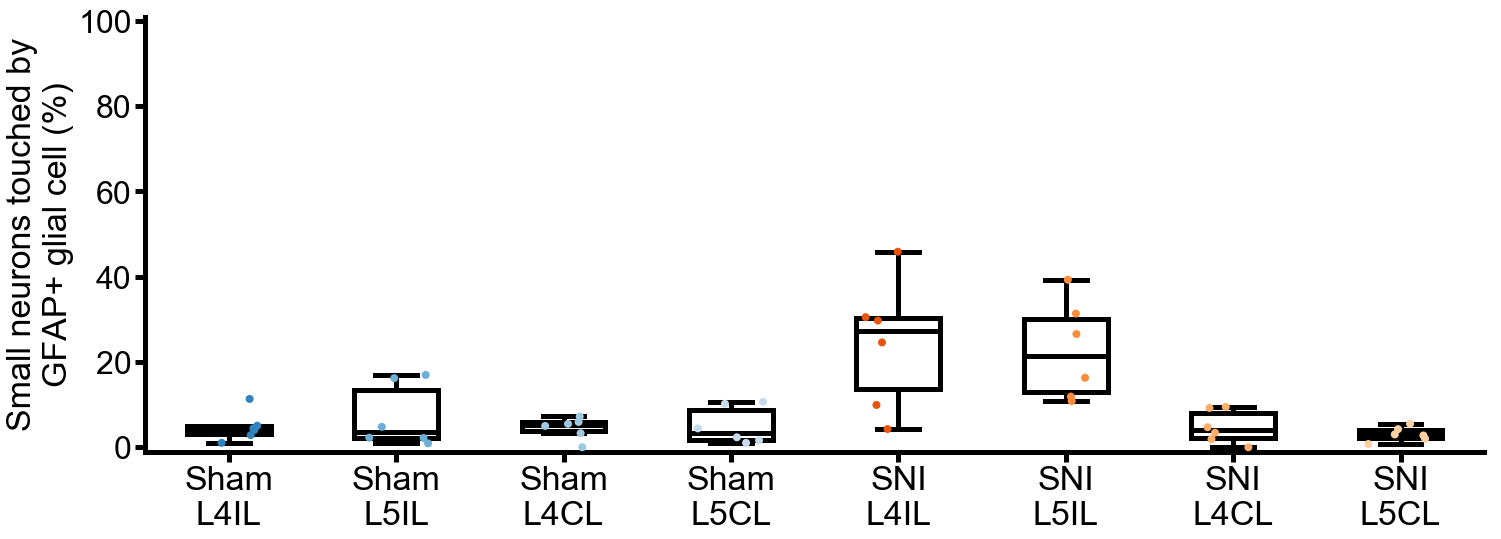

In [16]:
plot_all('small_neurons_gfap_ring', 'Small neurons touched by\nGFAP+ glial cell (%)')

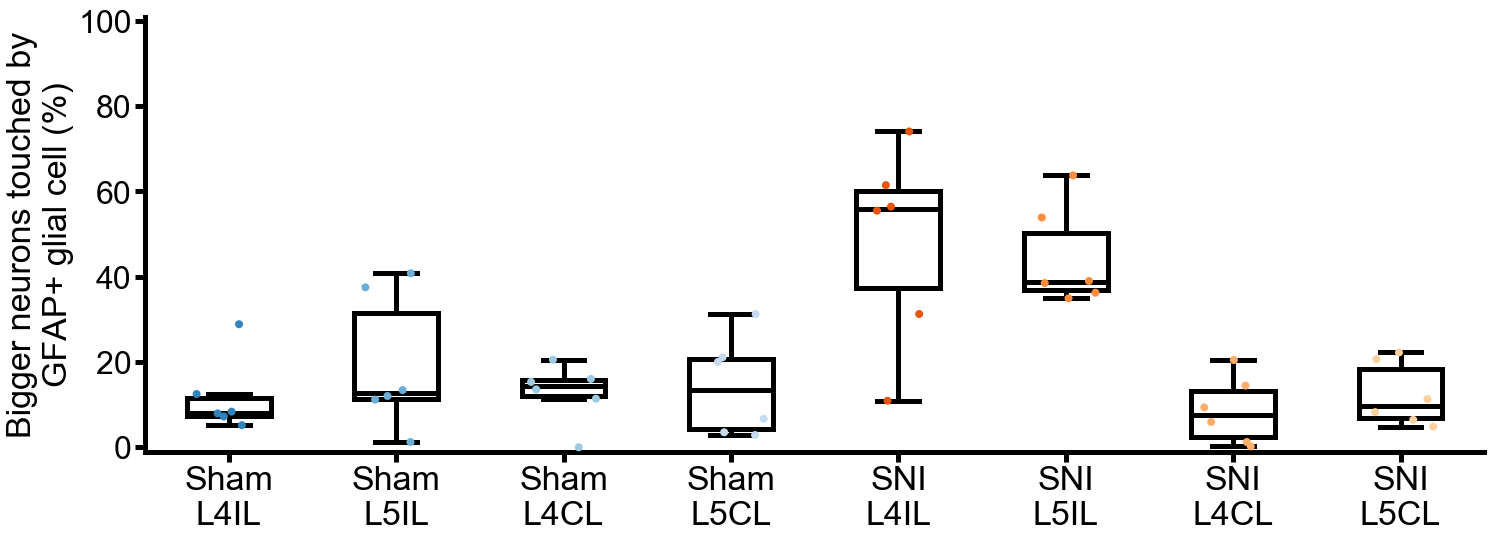

In [17]:
plot_all('bigger_neurons_gfap_ring', 'Bigger neurons touched by\nGFAP+ glial cell (%)')

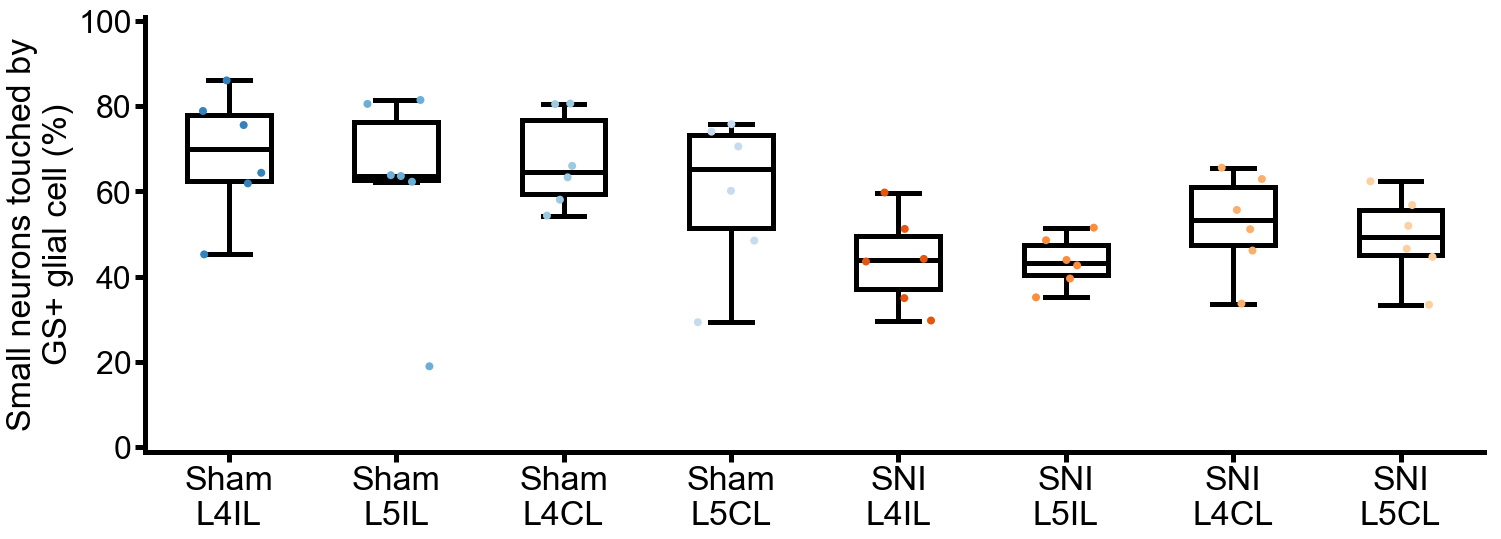

In [18]:
plot_all('small_neurons_gs_ring', 'Small neurons touched by\nGS+ glial cell (%)')

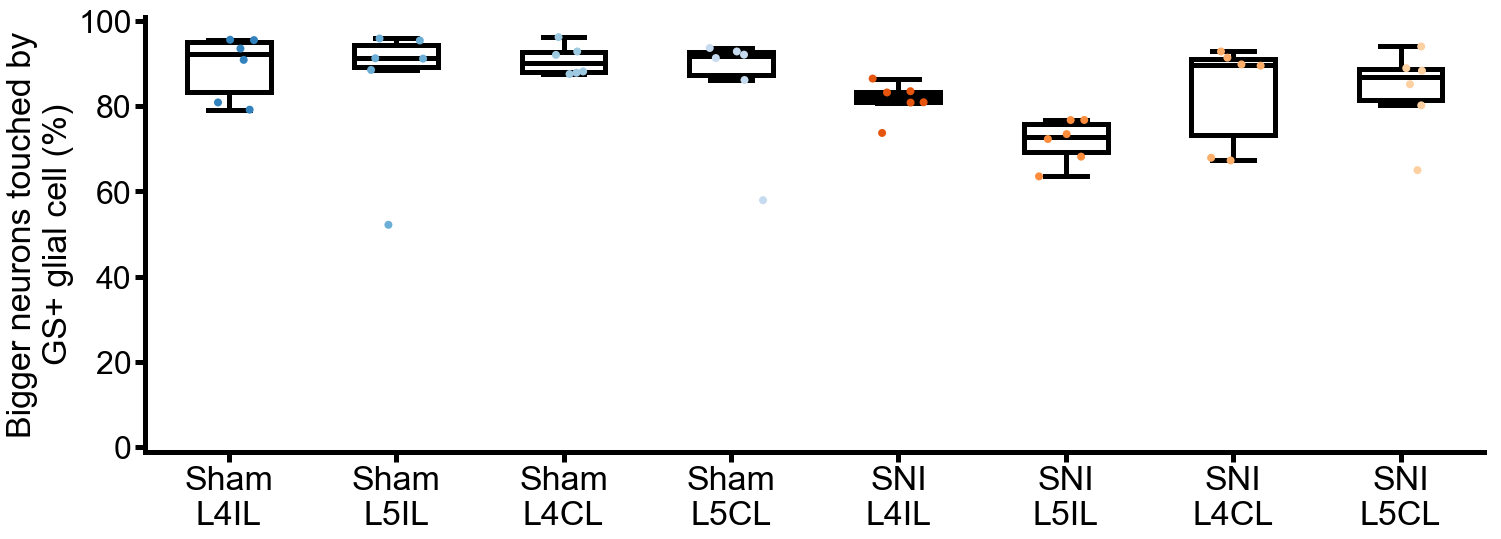

In [19]:
plot_all('bigger_neurons_gs_ring', 'Bigger neurons touched by\nGS+ glial cell (%)')